# Loan Qualification Activity

Contoso Data helps customers qualify for home loans. They are a global data science company that works in all sectors of housing.  Customers first apply for a home loan after Contoso Data validates the customer eligibility for a loan.

In this project, Contoso Data wants to automate the loan eligibility process (real-time) based on customer details provided while filling out an online application form. These details are listed below in the table with the variable names and descriptions. The variables are listed exactly how they are in the data.

> A data dictionary is a description of data in business terms, also including information about the data such as data types, details of structure, and security restrictions.

## Data Dictionary - Variable Descriptions

|VARIABLE | DESCRIPTION|
|---|---|
|Loan_ID|Unique Loan ID|
|Gender|Male/Female|
|Married|Applicant married (Y/N)|
|Dependents|Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Applicant income|
|CoapplicantIncome|Coapplicant income|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|Credit History meets guidelines|
|Property_Area|Urban/ Semi Urban/ Rural|
|Loan_Status|Loan approved (Y/N)|


## The Problem

We will assume to role of data scientist for Contoso Data and approach this problem exactly how we would do it in the real world. A data scientist with expertise in home mortgages would often be called on to create models that classify or determine specific outcomes based on some data they are given. These could be logistic regression models, linear regression, or a custom model that would take a team of experts to develop the inputs, weights, and outcomes. 

Just as if we actually worked in the Contoso Data Center, we'll create a common yet valuable tool that a loan officer with thousands of applications would use to quickly determine the best candidates for loans. The Loan Officer is our domain expert and would consult a data scientist, such as yourself, to come up with ways to make accurate pre-selections, and also save a great deal of time. 

Our task will be to create a machine learning model that will predict whether or not a loan will be approved.

### Data Science Ethical Practices

Both the Certified Analytics Professional (CAP) and the United Nations Statistics Division have released official codes and declarations of ethics to address data science directives. The purpose of these guidelines are to clarify crucially important ethical requirements that set standards, help in deterring deceitful behavior, and keep individuals and organizations accountable for the ways they collect and use data-driven information. 

It's important that data scientists learn and find training to address ethical issues in data science and within their industries.

We can start by taking some responsibility and set some guidelines. Here are some common guidelines that we should use when working with data: 1) collect minimal data and aggregate what is there, in other words, only collect what's needed. 2) Identify and scrub sensitive data, and 3) have a plan in case you make a mistake. 

### Removing the Gender and Married fields

Since we would not discriminate against people based on their gender, we wil remove that field. Also, instead of basing our decision on whether or not someone is married, we'll remove it and use something like income since it would be a more objective variable to base a loan decision on.

## The Data Science Process

1. Understanding the domain
2. Making a plan
3. Exploring the data
4. Preparing the data
5. Training your model
6. Review your results
7. Deployment

During our workshop we've talked a lot about why understanding the domain you are working in data science is so critical to uncovering the most valuable insights in your data. In other words, you know the business **inside and out**. By knowing your business your experiements will be more efficient and tackle the known issues in your domain. Does this mean that we shouldn't *play* with other datasets? Of course not, in fact, using other data and exploring it can uncover insight and be a great tool for learning.

### The Plan

This dataset provides you a taste of working on data sets from insurance companies – what challenges are faced there, what strategies are used, which variables influence the outcome, etc. The data has 615 rows and 13 columns. Our plan will be to approach this problem as a **logistical regression** study.

### Importing Libraries and Data

To begin the loan qualification activity we should first load the dataset and the libraries that we will be using.

We will import the following libraries to aid in our study and activity.

* `numpy`
* `matplotlib`
* `pandas`

For more information on using `numpy` and `pandas` the pandas website has a tutorial that will cover their usage in [10 minutes.]( https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

#Reading the dataset in a dataframe using pandas
df = pd.read_csv("Data/loan_prediction_training_data.csv") 

### Checkpoint

> Remember that you can use a question mark after any method or function in the Jupyter notebook. To read more about how to use the `read_csv` function, use the code below:

In [2]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]],
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    error_bad_lines=True,
    warn_bad_l

### Exercise: Explore the Data

**You can scroll to the right as well to see all the fields in the dataset.**

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Checkpoint: describe() function

The `describe` function provides count, mean, standard deviation, min, quartiles, and max in its' output. If you need a refresher on some of these values review them in this [article.](https://www.analyticsvidhya.com/blog/2014/07/statistics/)

What are some inferences you can make about the data looking at the output from the describe function? You should be looking for things like missing values, inconsistencies, and other problems with your data. You might have to reference an domain expert (if you're not one), and find out more information about the data.

From the `describe` function we can see that LoanAmount, Loan_Amount_Term and Credit_History are all missing values. 

Also, if we recall exploring the output of the `head` function, we saw that Credit_History only has 1 or 0 as values. Looking at the mean value, we see that only 84% of the applicants have credit histories. Do you notice anything else?

### Non-numerical values

First, let's deal with the `Gender` and `Married` columns. We will drop them.

In [6]:
df.drop(columns=['Gender', 'Married'], inplace=True)

Okay, now that's taken care of--Well Done!

In [7]:
# Let's save the data to a new file
df.to_csv('Data/loan_prediction_training_data_no_G_M.csv')

For dealing with non-numerical data (e.g. Property_Area, Education, Self_Employed) we can examine the frequency distribution and try to understand the data more. We can use the `.value_counts()` function.

In [8]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [9]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

### Distribution Analysis

After a cursory exploration of the data, we should now look at the distribution of the numeric data, specifically ApplicantIncome and LoanAmount. Let's use a histogram to plot a histogram of ApplicantIncome. We know there is a wide range of variation here in the values, so we'll use 50 bins to properly depict the distribution.

<AxesSubplot:>

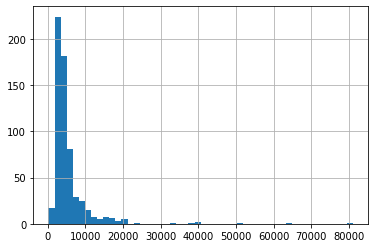

In [11]:
df['ApplicantIncome'].hist(bins=50)

Now we can use boxplots to better understand the distributions.

<AxesSubplot:>

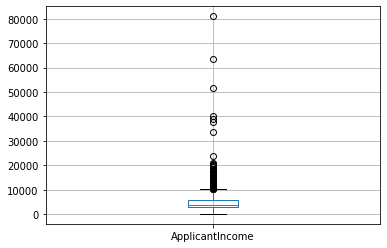

In [12]:
df.boxplot(column='ApplicantIncome')

The boxplot confirms that we have a lot of outliers in our data. We already know that there is a huge difference between how much money different individuals make, and much of it is due to their education level. Let's break college graduates and non-college graduates out into groups

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

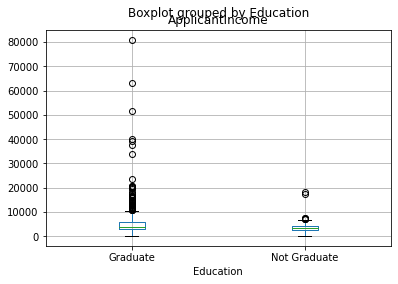

In [13]:
df.boxplot(column='ApplicantIncome', by = 'Education')

Now let's do a similar review of the LoanAmount variable.

<AxesSubplot:>

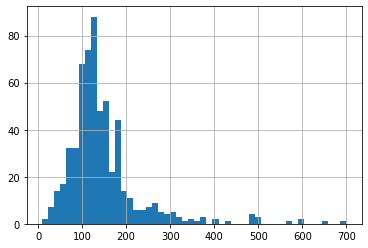

In [14]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

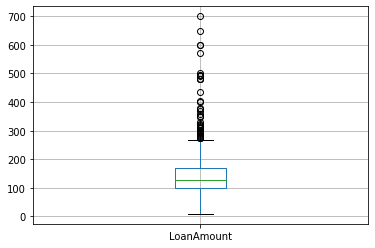

In [15]:
df.boxplot(column='LoanAmount')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Education'>

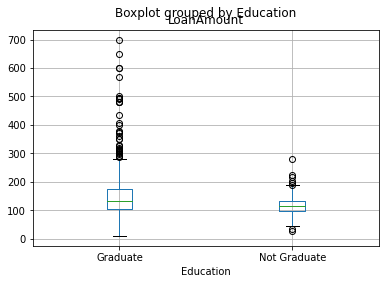

In [16]:
df.boxplot(column='LoanAmount', by = 'Education')

Extremely interesting and clear results. It's obvious that ApplicantIncome and LoanAmount are going to require some amount of data processing and munging to give us better results. 

One more plot we should look at before we go is whether or not being self-employed is a factor in a loan approval.

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Self_Employed'>

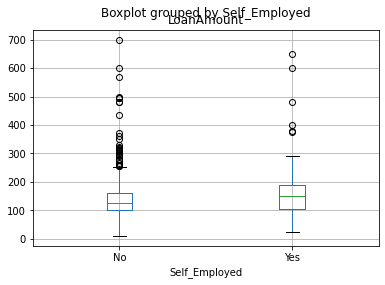

In [17]:
df.boxplot(column='LoanAmount', by = 'Self_Employed')

### Exercise

What are some other boxplots and histograms you would like to examine? Take some time now to do your own investigations on some variables.

### Categorical Data Analysis

What's categorical data? In this case we are referring to non-numerical data such as words as values. What can we do with this sort of data to gain a better understanding? 

Let's look at the chances a person has getting a loan based solely on credit history. We will look at the Loan_Status data which is a boolean value, 0 or 1. We can assume that 0 is for a No, and 1 is for a Yes. We will use a pivot table in pandas to make this visual.

In [18]:
# First we will create a frequency table on the Credit_History column to see how it is distributed.
temp1 = df['Credit_History'].value_counts(ascending=True)

# Let's also create a pivot table that shows us the probability of loan approval when you factor in credit history.
# Loan_Status is coded 1 for approved and 0 for unapproved, this means the average of all 
# the values is the probablity of getting a loan.

temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbability of getting loan based on Credit_History:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan based on Credit_History:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


### Challenge: Find the Average of the Loan_Status variable

How can we find the average of the Loan_Status column? Hint: The data is categorical. One way to solve this is to find out how many 'Y' answers there are and then divide that by the total number of values in the column. 

Hint: Use the `value_counts` function and then just divide the values.

We can also look at plots of this data. Let's create more plots and gain more understanding about the data.

<AxesSubplot:title={'center':'Probability of Approval Based on Credit History'}, xlabel='Credit_History', ylabel='Probability of Approval'>

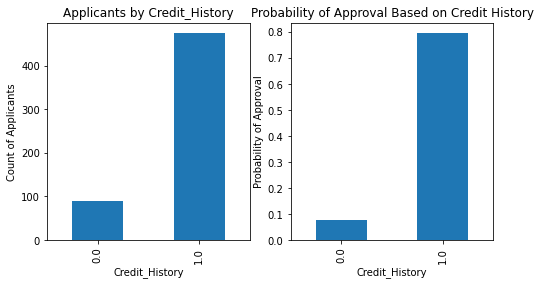

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of Approval')
ax2.set_title("Probability of Approval Based on Credit History")
temp2 = temp2.squeeze()
temp2.plot(kind = 'bar')


Now try changing the Credit_History variable to something else like Married, Self_Employed, or Property Area. Do any of the variable closely correlate?

### Stacked Charts

We can also create a stacked chart that combines the plots above.

<AxesSubplot:xlabel='Credit_History'>

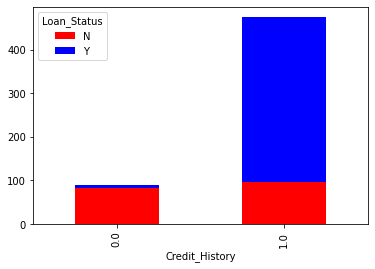

In [20]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [21]:
pd.crosstab?

Signature:
pd.crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins=False,
    margins_name: str = 'All',
    dropna: bool = True,
    normalize=False,
) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arrays passed.
aggfunc : function, optional
    If specified, requires `values

Loan_Status                   N    Y
Credit_History Education            
0.0            Graduate      57    6
               Not Graduate  25    1
1.0            Graduate      73  307
               Not Graduate  24   71

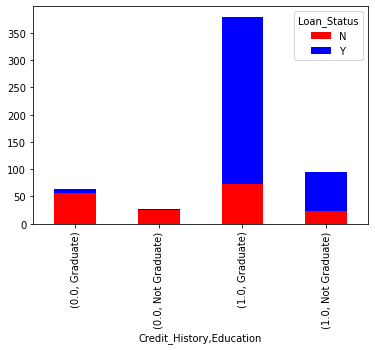

In [23]:
temp3 = pd.crosstab([df['Credit_History'], df['Education']], df['Loan_Status'],)
temp3.plot(kind='bar', stacked=True, color=['red','blue'], )
temp3

**Congratulations!** Did you realize what we just did? We just created two basic **classification algorithms!** We created the first one that is based just on Credit_History, and then we created on based on Credit_History and Education. 

This is the last step that we'll do in exploring our dataset. From the exploration we know that we need to deal with some messy data. Let's move on to some **Data Munging.**

### Data Munging and Preparing our Data

In the previous part of our process we learned about some of the problems with our data, specifically that we have some missing values. If we are going to "fix" these problems we need to be extremely careful and thoughtful about what type of data we will use to fill in the empty values. 

We noticed that in the ApplicantIncome and LoanAmount columns there was also outlying data on the extreme ends of the ranges. Even though we understand why the values are the way they are, we should do something with the outlying values as well.

Let's see what we can do with the `apply` function, first let's examine what it does.

In [24]:
# The apply function applies a function across the axis of a dataframe.
df.apply?

Signature: df.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns': apply function to each row.

raw : bool, default False
    Determines if row or column is passed as a Series or ndarray object:

    * ``False`` : passes each row or column as a Series to the
      function.
    * ``True`` : the passed function will receive ndarray objects
      instead.
 

In [25]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The `lambda` function allows us to scan through the dataframe and find all the fields that contain a null value.

Note: Even though we don't have a huge number of missing data, we should still do a little more work and estimating if we can fill though values with fill data that makes sense. We should also check for thing that we notice. For example, Loan_Amount_Term has 14 null values. If a loan is made with a loan period of 0, is it null? Let's explore a bit more.

### Filling null values in LoanAmount

Figuring what to fill null values with can be tricky, and you should always refer to a domain expert if possible. But in this case, we can probably use the average loan amout to fill the null values. We will do that first.

In [26]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [27]:
# Let's check and see, we shouldn't see any null values in the LoanAmount column
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
# Now we can figure out what the fill value for loan amount is using value_counts
df['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
570.000000     1
300.000000     1
376.000000     1
117.000000     1
311.000000     1
Name: LoanAmount, Length: 204, dtype: int64

### Filling values in the Self_Employed Column

From our exploration step, we know that there are quite a few null values in the self employed column. Let's figure out a good way to fill the null values based on what we know about the data we do have.

AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)


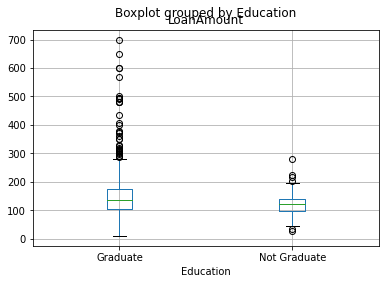

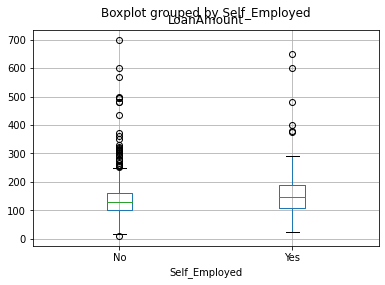

In [29]:
print(df.boxplot(column='LoanAmount', by = 'Education'))
print(df.boxplot(column='LoanAmount', by = 'Self_Employed'))

We can use these boxplots to spot trends in our data, and we see some variation between the median loan amount so that can be used to impute the data. Let's verify that Self_Employed and Education should not have any null or missing values.

In [30]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [31]:
# Now we can calculate the percentage of 'No' responses
print('Percentage of "No" values in the data is:', 500/582*100,'%')

Percentage of "No" values in the data is: 85.91065292096219 %


Since about 86% of the responses in this column are a No, it is safe for us to impute the missing values as "no" values. We can do that with this code:


In [32]:
df['Self_Employed'].fillna('No',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


The next step is to create a pivot table, that will provide us the median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:

In [33]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [34]:
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [35]:
# Replace missing values
df['LoanAmount'].fillna(df.apply(fage, axis=1), inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


### Using a log transformation to nullify the effect of extreme values

Let's look at LoanAmount first. We already know that people apply for loans in all ranges, including high value loans for specific properties. Instead of treating them as outliers, we can use a log transformation to reduce the effect they have on representing the data.

<AxesSubplot:>

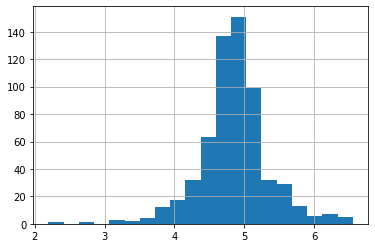

In [37]:
# Let's pull the histgram again
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now this distribution looks better. The effect that the higher limit values has been considerably reduced.

One more thing to note when considering ApplicantIncome. Did you notice that there was also a CoapplicantIncome? It might be a good idea to combine these columns into a TotalIncome column and do a log transformation.

<AxesSubplot:>

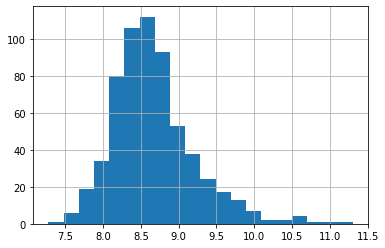

In [39]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

The distribution again is better than before. You can decide whether or not you will continue the munging exercise with Dependents or the other variables. 

### Building a predictive model in Python

So far we've spent a lot of time prepping our data getting it ready for our model. We'll be using a new library (for us) to code our model. Scikit-learn (sklearn) is the most commonly used data science library in Python for this purpose.

Skicit-Learn requires that all inputs be numeric, but first let's quickly fill in all the null values within our data. 

For the sake of time, we've prepared all the code for you here.

In [40]:
# Quick Fill of all the null values in the data
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [41]:
# Here were are using LabelEncoder to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
from sklearn.preprocessing import LabelEncoder

var_mod = ['Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
#fancy huh?    
df.dtypes

Loan_ID               object
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [42]:
# Let's check! All taken care of.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  LoanAmount_log     614 non-null    float64
 12  TotalIncome        614 non-null    float64
 13  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(6), object(1)
memory usage: 67.3+ KB


In [43]:
# Now we can finish the model
# Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Generic function for making a model and accessing performance:
def loan_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

### Building a logistical regression model

Remember that logistical regression is a model that returns a binary answer. In this case it will return whether or not a loan is approved based on the parameters provided. 

We want to create a model that generalizes well. If we take all the data and use that to train our model, we run into the risk of 'overfitting' the model. 

Let's first start by making some simple hypothesis about how someone's chances of getting a loan will be higher.

1. We know already having a credit history is huge.
2. Higher incomes, combining coapplicant and applicant incomes will help.
3. We also saw that applicants with higher education get loans.
4. We also know properties in high growth locations will make better loans.

In [44]:
# Let's first work with Credit_History - We start by assigning Loan_Status as the outcome variable
outcome_var = 'Loan_Status'

# Select the Model
model = LogisticRegression()

# Use credit history
predictor_var = ['Credit_History']

# call the model
loan_model(model, df, predictor_var, outcome_var)

Accuracy : 80.945%


### BONUS:  Decision Tree and Random Forest

A decision tree is another predictive model. We can easily import the model from the sklearn library. In addition we can also do the same thing for the Random Forest model, which is a classification model.

In [45]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Dependents','Self_Employed','Education']
loan_model(model, df,predictor_var,outcome_var)

Accuracy : 81.270%


Can you do any better? Play with the code and try to get a higher accuracy value

### One possible solution

In [46]:
# Let's try using the RandomForestClassifier model. Random Forest Classifier
# A random forest is a meta estimator that fits a number of decision tree classifiers 
# on various sub-samples of the dataset and uses averaging to improve the predictive 
# accuracy and control over-fitting. 
model = RandomForestClassifier(n_estimators=10) # n_estimators == number of trees in the forest
predictor_var = ['Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log']
loan_model(model, df,predictor_var,outcome_var)

Accuracy : 95.114%


### Key Takeaways

1. Using a more sophisticated model does not guarantee better results.
2. Avoid using complex modeling techniques as a black box without understanding the underlying concepts. Doing so would increase the tendency of overfitting thus making your models less interpretable
3. Feature Engineering is the key to success. Everyone can use the prebuilt models but the real art and creativity lies in enhancing your features to better suit the model.